In [1]:
import pandas as pd

In [ ]:
# Buisness -> Supervised | Regression
# Data cleaning | Data analysis | EDA

# Diesel fuel and Hyprid analysis

In [89]:
dbh = pd.read_csv('DBH.csv')
dbh.head()

,Name,CarName,fueltype,price,model,used/new,accident,milage,engine,model_year,ext_col,int_col
0,Sheet1,alfa,gasoline,"$13,495.00",romero giulia,new,None reported,0 mi.,0.13,NaN,NaN,NaN
1,Sheet1,alfa,gasoline,"$16,500.00",romero stelvio,new,None reported,0 mi.,0.13,NaN,NaN,NaN
2,Sheet1,alfa,gasoline,"$16,500.00",romero Quadrifoglio,new,None reported,0 mi.,0.152,NaN,NaN,NaN
3,Sheet1,audi,gasoline,"$13,950.00",100 ls,new,None reported,0 mi.,0.109,NaN,NaN,NaN
4,Sheet1,audi,gasoline,"$17,450.00",100ls,new,None reported,0 mi.,0.136,NaN,NaN,NaN


In [90]:
# basic info from the data
print(dbh.info())
print(dbh.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4076 entries, 0 to 4075
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        4075 non-null   object 
 1   CarName     4074 non-null   object 
 2   fueltype    4046 non-null   object 
 3    price      4074 non-null   object 
 4   model       4074 non-null   object 
 5   used/new    4075 non-null   object 
 6   accident    4069 non-null   object 
 7   milage      4074 non-null   object 
 8   engine      4074 non-null   object 
 9   model_year  3869 non-null   float64
 10  ext_col     3866 non-null   object 
 11  int_col     3862 non-null   object 
dtypes: float64(1), object(11)
memory usage: 382.2+ KB
None
        model_year
count  3869.000000
mean   2015.586973
std       5.849809
min    1996.000000
25%    2012.000000
50%    2017.000000
75%    2020.000000
max    2024.000000


In [92]:
# the data not clean -> the price is str with $, also the column name have space
dbh = dbh.copy()
dbh.columns = dbh.columns.str.strip()
dbh.columns

Index(['Name', 'CarName', 'fueltype', 'price', 'model', 'used/new', 'accident',
       'milage', 'engine', 'model_year', 'ext_col', 'int_col'],
      dtype='object')

In [5]:
# now fix the issue of the price is str
dbh['price'] = dbh['price'].str.replace('$', '')
dbh['price'] = dbh['price'].str.strip() # cause there spaces in the records
dbh['price'] = dbh['price'].str.replace(',', '') # if not remove the , this will give error
dbh['price'] = dbh['price'].apply(lambda x: float(x)) # convert to float
dbh.head()

,Name,CarName,fueltype,price,model,used/new,accident,milage,engine,model_year,ext_col,int_col
0,Sheet1,alfa,gasoline,13495.0,romero giulia,new,None reported,0 mi.,0.13,NaN,NaN,NaN
1,Sheet1,alfa,gasoline,16500.0,romero stelvio,new,None reported,0 mi.,0.13,NaN,NaN,NaN
2,Sheet1,alfa,gasoline,16500.0,romero Quadrifoglio,new,None reported,0 mi.,0.152,NaN,NaN,NaN
3,Sheet1,audi,gasoline,13950.0,100 ls,new,None reported,0 mi.,0.109,NaN,NaN,NaN
4,Sheet1,audi,gasoline,17450.0,100ls,new,None reported,0 mi.,0.136,NaN,NaN,NaN


In [6]:
# drop if price = Nan cause this will not help
dbh = dbh.dropna(subset=['price'])
dbh.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4074 entries, 0 to 4074
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Name        4074 non-null   object 
 1   CarName     4074 non-null   object 
 2   fueltype    4046 non-null   object 
 3   price       4074 non-null   float64
 4   model       4074 non-null   object 
 5   used/new    4074 non-null   object 
 6   accident    4069 non-null   object 
 7   milage      4074 non-null   object 
 8   engine      4074 non-null   object 
 9   model_year  3869 non-null   float64
 10  ext_col     3866 non-null   object 
 11  int_col     3862 non-null   object 
dtypes: float64(2), object(10)
memory usage: 413.8+ KB


In [7]:
# the data source from:
dbh.Name.value_counts()

Name
Sheet2    3869
Sheet1     205
Name: count, dtype: int64

In [8]:
dbh.query("`Name` == 'Sheet2'")

,Name,CarName,fueltype,price,model,used/new,accident,milage,engine,model_year,ext_col,int_col
206,Sheet2,Ford,E85 Flex Fuel,10300.0,Utility Police Interceptor Base,used,At least 1 accident or damage reported,"51,000 mi.",300.0HP 3.7L V6 Cylinder Engine Flex Fuel Capa...,2013.0,Black,Black
207,Sheet2,Hyundai,Gasoline,38005.0,Palisade SEL,used,At least 1 accident or damage reported,"34,742 mi.",3.8L V6 24V GDI DOHC,2021.0,Moonlight Cloud,Gray
208,Sheet2,Lexus,Gasoline,54598.0,RX 350 RX 350,used,None reported,"22,372 mi.",3.5 Liter DOHC,2022.0,Blue,Black
209,Sheet2,INFINITI,Hybrid,15500.0,Q50 Hybrid Sport,used,None reported,"88,900 mi.",354.0HP 3.5L V6 Cylinder Engine Gas/Electric H...,2015.0,Black,Black
210,Sheet2,Audi,Gasoline,34999.0,Q3 45 S line Premium Plus,used,None reported,"9,835 mi.",2.0L I4 16V GDI DOHC Turbo,2021.0,Glacier White Metallic,Black
...,...,...,...,...,...,...,...,...,...,...,...,...
4070,Sheet2,Mercedes-Benz,Gasoline,25900.0,E-Class E 300 4MATIC,used,At least 1 accident or damage reported,"53,705 mi.",241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,2018.0,Black,Black
4071,Sheet2,Bentley,Gasoline,349950.0,Continental GT Speed,used,None reported,714 mi.,6.0L W12 48V PDI DOHC Twin Turbo,2023.0,Black,Beige
4072,Sheet2,Audi,Gasoline,53900.0,S4 3.0T Premium Plus,used,None reported,"10,900 mi.",349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel,2022.0,Black,Black
4073,Sheet2,Ford,Gasoline,62999.0,F-150 Raptor,used,None reported,"33,000 mi.",450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,2020.0,Blue,Black


In [9]:
# The data come from two data source -> the first one is Sheet1 : for new cars
# he data come from two data source -> the first one is Sheet2 : for old cars

In [10]:
# check cars name

In [11]:
dbh.CarName.value_counts()

CarName
Ford             376
BMW              375
Mercedes-Benz    312
Chevrolet        289
Audi             200
                ... 
renault            1
toyota             1
toyota             1
vokswagen          1
Suzuki             1
Name: count, Length: 103, dtype: int64

In [12]:
dbh.shape

(4074, 12)

In [13]:
# the ratio of the unique values
103/4076 # this willbe good Keep for now

0.025269872423945045

In [14]:
dbh.fueltype.value_counts()

fueltype
Gasoline          3342
Hybrid             211
gasoline           185
E85 Flex Fuel      136
Diesel             116
Plug-In Hybrid      34
diesel              20
not supported        2
Name: count, dtype: int64

In [15]:
dbh.fueltype.unique()

array(['gasoline', 'diesel', 'E85 Flex Fuel', 'Gasoline', 'Hybrid',
       'Diesel', 'Plug-In Hybrid', nan, 'not supported'], dtype=object)

In [16]:
# this will be mapped cause we have
# Gasoline and gasoline also, E85 Flex Fuel -> gasoline-ethanol blend
# diesel and Diesel
# Hybrid and Plug-In Hybrid
# drop not supported

In [17]:
def fuelmap(st):
    if st == 'Gasoline' or st == 'gasoline' or st =='E85 Flex Fuel':
        return 'gasoline'
    elif st == 'Diesel' or st =='diesel':
        return 'diesel'
    elif st == 'Hybrid' or st == 'Plug-In Hybrid':
        return 'hybrid'
    else:
        return 'not supported'

In [18]:
dbh['fueltype'] = dbh['fueltype'].apply(fuelmap)
dbh.fueltype.value_counts()

fueltype
gasoline         3663
hybrid            245
diesel            136
not supported      30
Name: count, dtype: int64

In [19]:
dbh.model.value_counts()

model
M3 Base                      30
F-150 XLT                    23
Corvette Base                22
1500 Laramie                 18
Wrangler Sport               17
                             ..
S5 4.2 Premium Plus           1
Grand Cherokee L Overland     1
Sorento EX                    1
Boxster RS 60 Spyder          1
Impala 2LZ                    1
Name: count, Length: 1992, dtype: int64

In [20]:
# the model not really helpful cause it contain a lot of different values so better to drop
dbh.drop(columns=['model'], inplace=True)

In [21]:
dbh['used/new'].value_counts()

used/new
used    3869
new      205
Name: count, dtype: int64

In [22]:
# the model will surely will biased for the used cars, but i will keep it


In [23]:
dbh.accident.value_counts()

accident
None reported                             3072
At least 1 accident or damage reported     996
 None reported                               1
Name: count, dtype: int64

In [24]:
dbh.accident.unique()

array(['None reported', ' None reported',
       'At least 1 accident or damage reported', nan], dtype=object)

In [25]:
# jsut map the values to yes , no

def accidentmap(st):
    if st == 'None reported':
        return 'no'
    else:
        return 'yes'

dbh['accident'] = dbh['accident'].apply(accidentmap)
dbh.accident.value_counts()

accident
no     3072
yes    1002
Name: count, dtype: int64

In [26]:
# here assumed the null values are have accedints and the person for hidden this to protect his car from price drop

In [27]:
# now milage
dbh.milage.value_counts()

milage
0 mi.          205
110,000 mi.     15
45,000 mi.      15
55,000 mi.      13
54,000 mi.      12
              ... 
74,150 mi.       1
94,448 mi.       1
34,967 mi.       1
85,325 mi.       1
714 mi.          1
Name: count, Length: 2731, dtype: int64

In [28]:
# this in face a float value, so replace mi . and , by ''
dbh['milage'] = dbh['milage'].str.replace('mi', '')
dbh['milage'] = dbh['milage'].str.replace('.', '')
dbh['milage'] = dbh['milage'].str.replace(',', '')
dbh['milage'] = dbh['milage'].str.strip() # remove spaces
dbh['milage'] = dbh['milage'].apply(lambda x: float(x))

In [29]:
dbh.engine

0                                                0.13
1                                                0.13
2                                               0.152
3                                               0.109
4                                               0.136
                            ...                      
4070     241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
4071                 6.0L W12 48V PDI DOHC Twin Turbo
4072    349.0HP 3.0L V6 Cylinder Engine Gasoline Fuel
4073    450.0HP 3.5L V6 Cylinder Engine Gasoline Fuel
4074     248.0HP 2.0L 4 Cylinder Engine Gasoline Fuel
Name: engine, Length: 4074, dtype: object

In [30]:
# the engine have different values
# ok;
# for the new cars its only contain the motor size and other value not included
# for the used cars we can make a feature extraction to extract in new columns ->
# HP , motor-size , cylinders-number
# Recommandation -> split for new car or old cars datasets


In [31]:
dbh.model_year.value_counts()

model_year
2022.0    336
2021.0    334
2020.0    308
2018.0    303
2019.0    290
2016.0    260
2017.0    251
2015.0    227
2023.0    214
2014.0    179
2013.0    156
2012.0    138
2011.0    123
2008.0    112
2007.0     98
2010.0     98
2005.0     70
2009.0     70
2006.0     66
2004.0     59
2003.0     49
2001.0     34
2002.0     32
2000.0     16
1999.0     15
1998.0     11
1997.0      9
2024.0      6
1996.0      5
Name: count, dtype: int64

In [32]:
dbh.isna().sum()

Name            0
CarName         0
fueltype        0
price           0
used/new        0
accident        0
milage          0
engine          0
model_year    205
ext_col       208
int_col       212
dtype: int64

In [33]:
# the missing actually in the new cars -> so in that model we can drop them to not really effect -> lets check


In [34]:
dbh.query("`Name` == 'Sheet1'").isna().sum()

Name            0
CarName         0
fueltype        0
price           0
used/new        0
accident        0
milage          0
engine          0
model_year    205
ext_col       205
int_col       205
dtype: int64

In [35]:
# all in the new cars -> make two data sets and drop them

In [36]:
new = dbh.query("`Name` == 'Sheet1'")
old = dbh.query("`Name` == 'Sheet2'")

In [37]:
new.drop(columns=['Name','model_year','ext_col','int_col'], inplace=True)
old.drop(columns=['Name'], inplace=True)
old.dropna(inplace=True)

<ipython-input-37-f3ec8f5ddcd9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(columns=['Name','model_year','ext_col','int_col'], inplace=True)
<ipython-input-37-f3ec8f5ddcd9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old.drop(columns=['Name'], inplace=True)
<ipython-input-37-f3ec8f5ddcd9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old.dropna(inplace=True)


In [38]:
new.isna().sum()

CarName     0
fueltype    0
price       0
used/new    0
accident    0
milage      0
engine      0
dtype: int64

In [39]:
old.isna().sum()

CarName       0
fueltype      0
price         0
used/new      0
accident      0
milage        0
engine        0
model_year    0
ext_col       0
int_col       0
dtype: int64

In [40]:
# great
# now extract new feaature from the old
# HP , motor-size , cylinders-number

In [41]:
with open('new.txt', 'w') as f:
  for engine in old.engine:
    f.write(engine + '\n')


In [42]:
old.shape

(3860, 10)

In [43]:
# Function to extract features
import re
def extract_features(engine_str):
    hp_match = re.search(r'(\d+\.?\d*)HP', engine_str)
    motor_size_match = re.search(r'(\d+\.?\d*)L', engine_str)
    cylinders_match = re.search(r'(\d+)\s*Cylinder', engine_str)

    hp = float(hp_match.group(1)) if hp_match else 0
    motor_size = float(motor_size_match.group(1)) if motor_size_match else 0
    cylinders = int(cylinders_match.group(1)) if cylinders_match else 0

    return pd.Series([hp, motor_size, cylinders])

# Apply the function to the engine column
old[['HP', 'motor_size', 'cylinders']] = old['engine'].apply(extract_features)

# Drop rows where any extracted feature is 0
old = old[(old[['HP', 'motor_size', 'cylinders']] != 0).all(axis=1)]

# check result size
old.size

<ipython-input-43-b77408d4b338>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old[['HP', 'motor_size', 'cylinders']] = old['engine'].apply(extract_features)
<ipython-input-43-b77408d4b338>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old[['HP', 'motor_size', 'cylinders']] = old['engine'].apply(extract_features)
<ipython-input-43-b77408d4b338>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See t

39494

In [44]:
old.shape

(3038, 13)

In [45]:
# ~ around 800 are electrical or other types

In [46]:
old.drop(columns=['engine'],inplace=True,axis=1)
old.head()

<ipython-input-46-846ec4eac300>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  old.drop(columns=['engine'],inplace=True,axis=1)


,CarName,fueltype,price,used/new,accident,milage,model_year,ext_col,int_col,HP,motor_size,cylinders
206,Ford,gasoline,10300.0,used,yes,51000.0,2013.0,Black,Black,300.0,3.7,6.0
209,INFINITI,hybrid,15500.0,used,no,88900.0,2015.0,Black,Black,354.0,3.5,6.0
212,Audi,gasoline,31000.0,used,no,84000.0,2017.0,Blue,Black,292.0,2.0,4.0
213,BMW,gasoline,7300.0,used,no,242000.0,2001.0,Green,Green,282.0,4.4,8.0
214,Lexus,gasoline,41927.0,used,no,23436.0,2021.0,Black,Black,311.0,3.5,6.0


In [47]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 206 to 4074
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarName     3038 non-null   object 
 1   fueltype    3038 non-null   object 
 2   price       3038 non-null   float64
 3   used/new    3038 non-null   object 
 4   accident    3038 non-null   object 
 5   milage      3038 non-null   float64
 6   model_year  3038 non-null   float64
 7   ext_col     3038 non-null   object 
 8   int_col     3038 non-null   object 
 9   HP          3038 non-null   float64
 10  motor_size  3038 non-null   float64
 11  cylinders   3038 non-null   float64
dtypes: float64(6), object(6)
memory usage: 308.5+ KB


In [48]:
# new or used column check
old['used/new'].value_counts()

used/new
used    3038
Name: count, dtype: int64

In [49]:
# so drop it
old.drop(columns=['used/new'],inplace=True)

In [50]:
new.drop(columns=['used/new'],inplace=True)

<ipython-input-50-91f588ab83e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(columns=['used/new'],inplace=True)


In [51]:
# check colors
old.int_col.value_counts()

int_col
Black     1660
Beige      509
Gray       425
Brown      156
Red        117
White       86
Blue        27
Orange      19
Silver      14
Gold         9
Green        6
–            3
Yellow       2
Blaclk       1
beige        1
Beige        1
Black        1
Ebony        1
Name: count, dtype: int64

In [52]:
old.ext_col.value_counts()

ext_col
Black     786
White     709
Gray      434
Silver    335
Blue      306
Red       214
Green      60
Brown      43
Gold       41
Beige      37
Orange     33
Yellow     28
Purple     11
Pink        1
Name: count, dtype: int64

In [53]:
color_normalization = {
    'Black': 'Black',
    'Blaclk': 'Black',
    'Beige': 'Beige',
    'beige': 'Beige',
    'Gray': 'Gray',
    'Brown': 'Brown',
    'Red': 'Red',
    'White': 'White',
    'Blue': 'Blue',
    'Orange': 'Orange',
    'Silver': 'Silver',
    'Gold': 'Gold',
    'Green': 'Green',
    '–': '–',
    'Yellow': 'Yellow',
    'Ebony': 'Ebony'
}

old.int_col.map(color_normalization)

206     Black
209     Black
212     Black
213     Green
214     Black
        ...  
4069    Beige
4070    Black
4072    Black
4073    Black
4074    Brown
Name: int_col, Length: 3038, dtype: object

In [54]:
old.int_col = old.int_col.map(color_normalization)

In [55]:
old.int_col.value_counts()

int_col
Black     1661
Beige      510
Gray       425
Brown      156
Red        117
White       86
Blue        27
Orange      19
Silver      14
Gold         9
Green        6
–            3
Yellow       2
Ebony        1
Name: count, dtype: int64

In [56]:
old.columns

Index(['CarName', 'fueltype', 'price', 'accident', 'milage', 'model_year',
       'ext_col', 'int_col', 'HP', 'motor_size', 'cylinders'],
      dtype='object')

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def plot_data(df):
    # Identify numeric and categorical columns
    numeric_cols = df.select_dtypes(include=['number']).columns
    categorical_cols = df.select_dtypes(exclude=['number']).columns

    # Plot histograms for numeric columns
    for col in numeric_cols:
        plt.figure(figsize=(10, 5))
        sns.histplot(df[col], bins=30, kde=True)
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

    # Plot bar and pie charts for categorical columns
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        sns.countplot(y=df[col], order=df[col].value_counts().index)
        plt.title(f'Bar Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()

        plt.figure(figsize=(10, 10))
        df[col].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='Set3')
        plt.title(f'Pie Chart of {col}')
        plt.ylabel('')
        plt.show()




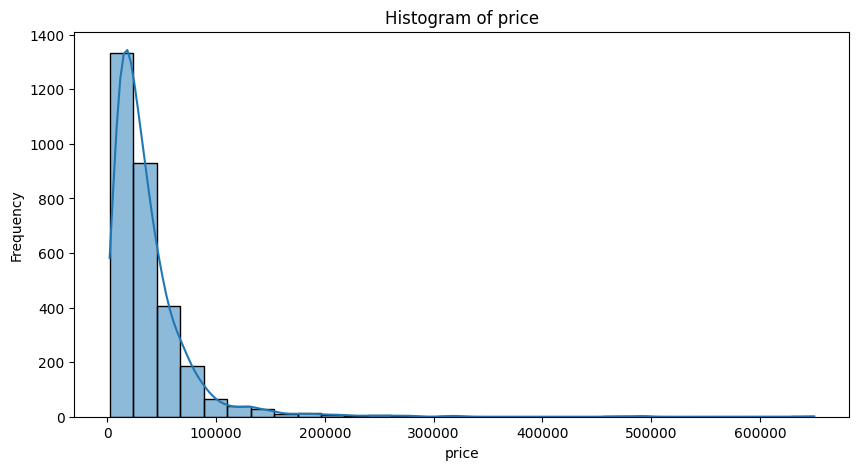

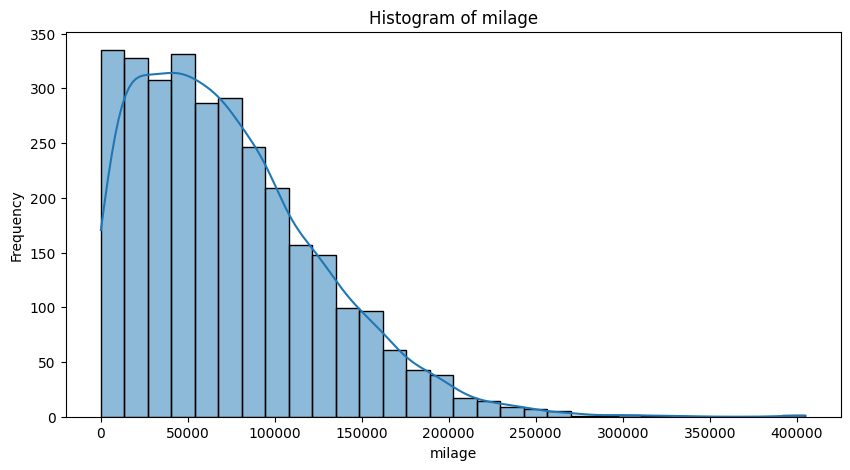

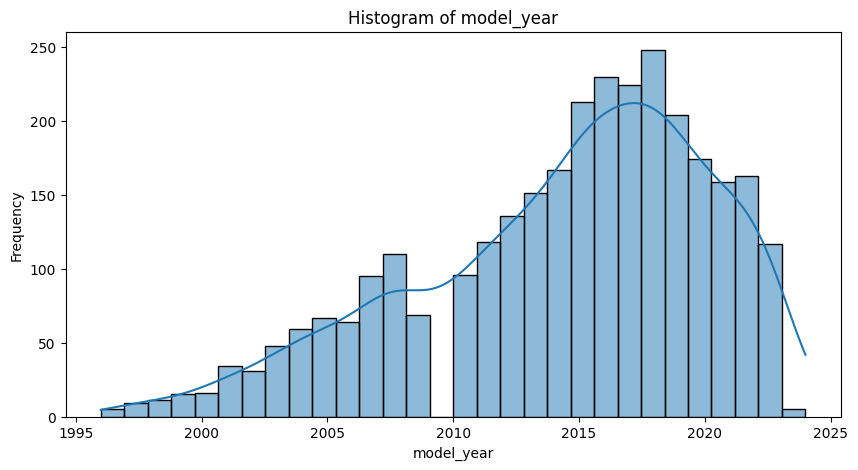

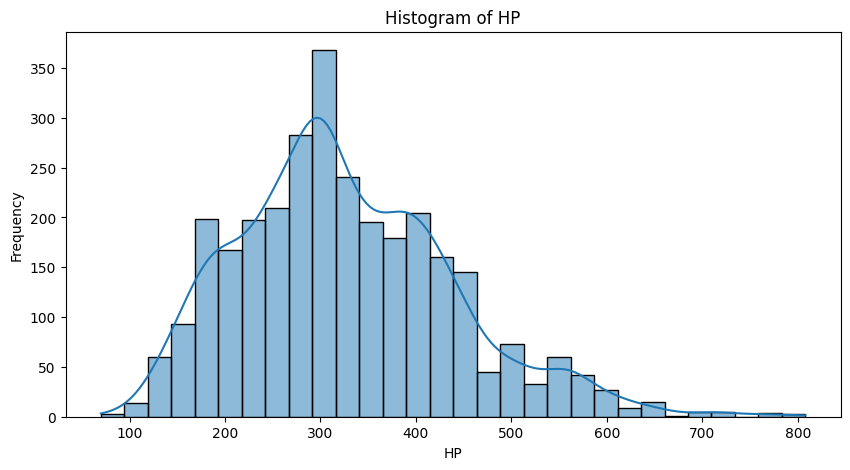

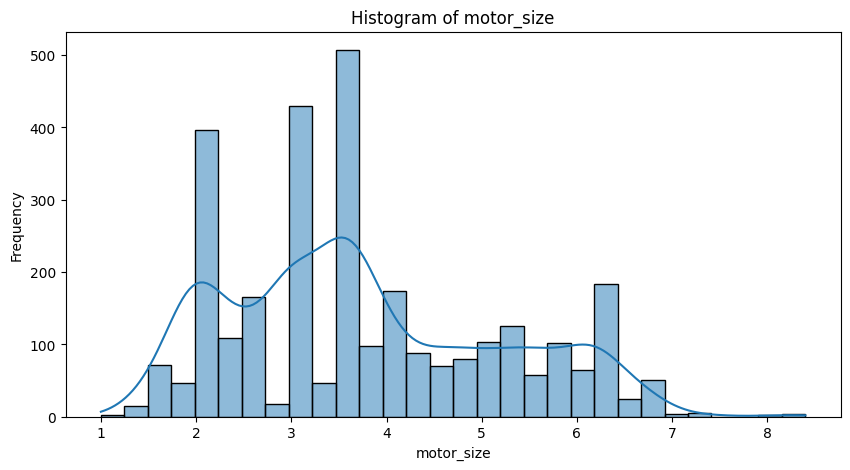

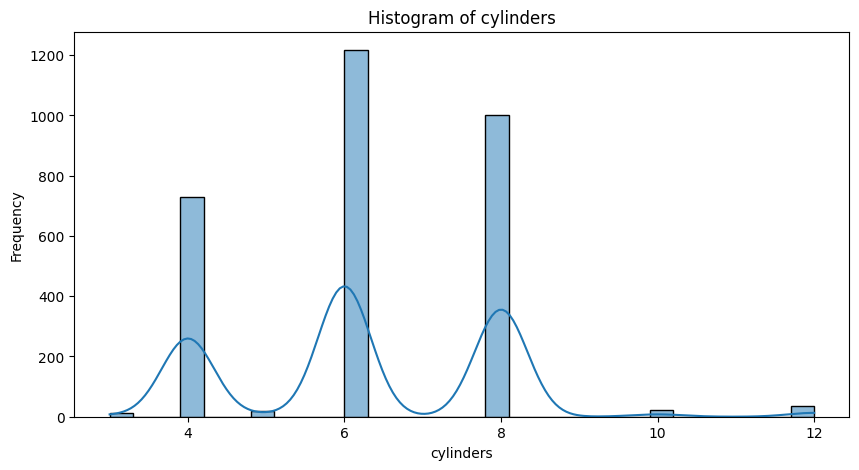

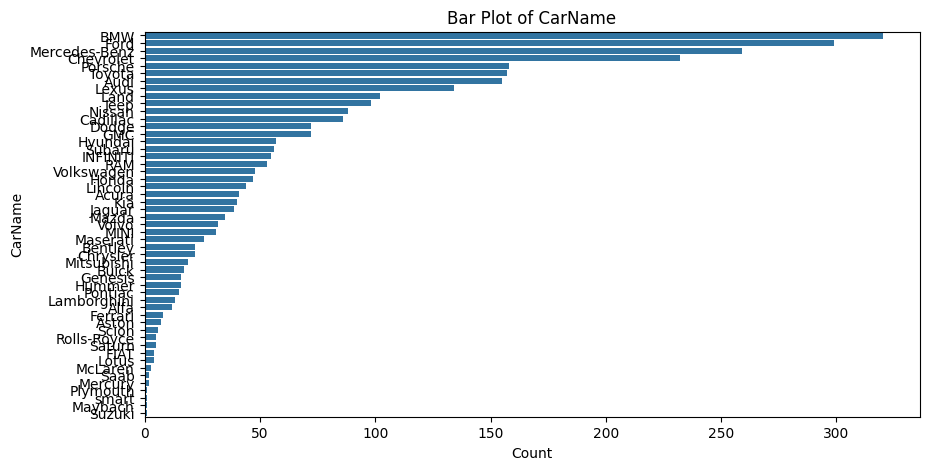

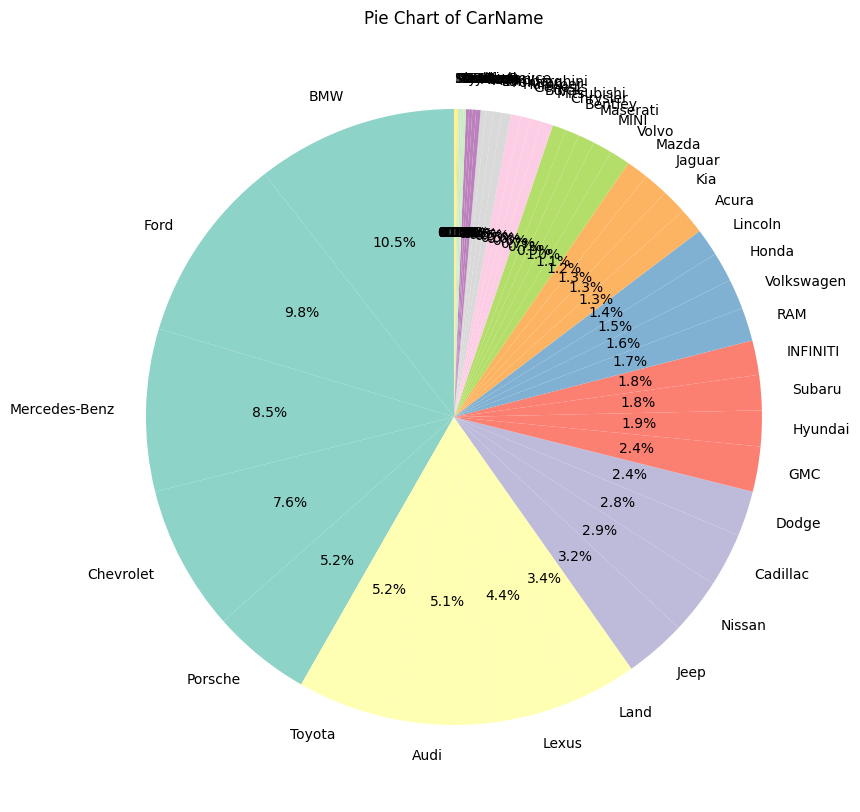

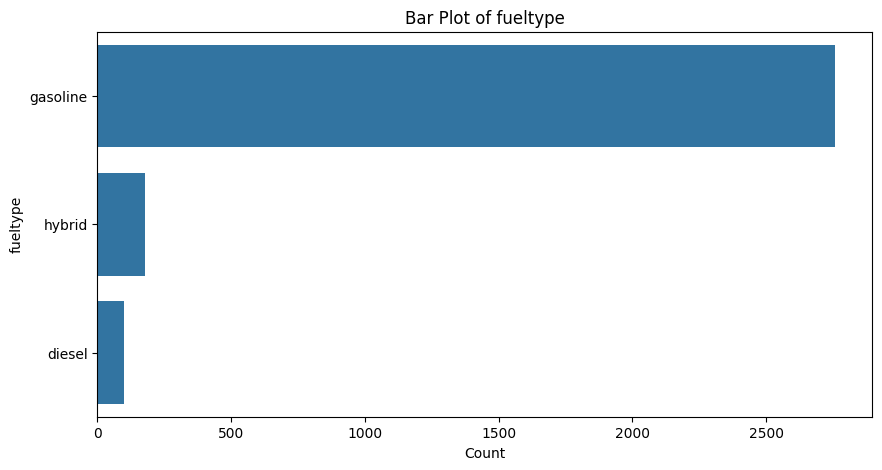

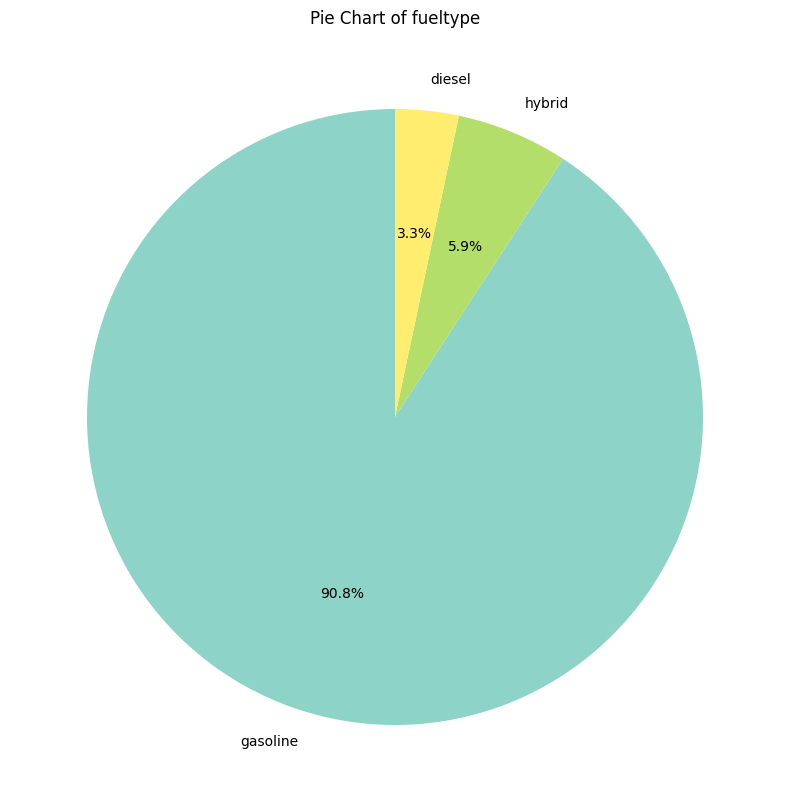

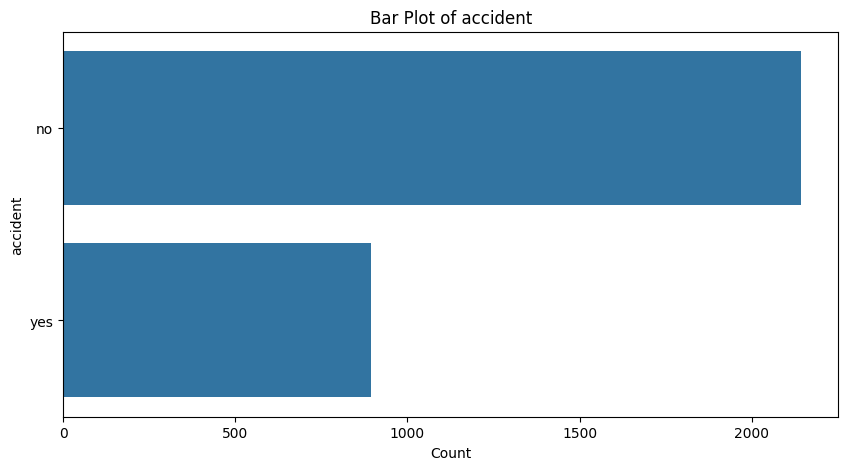

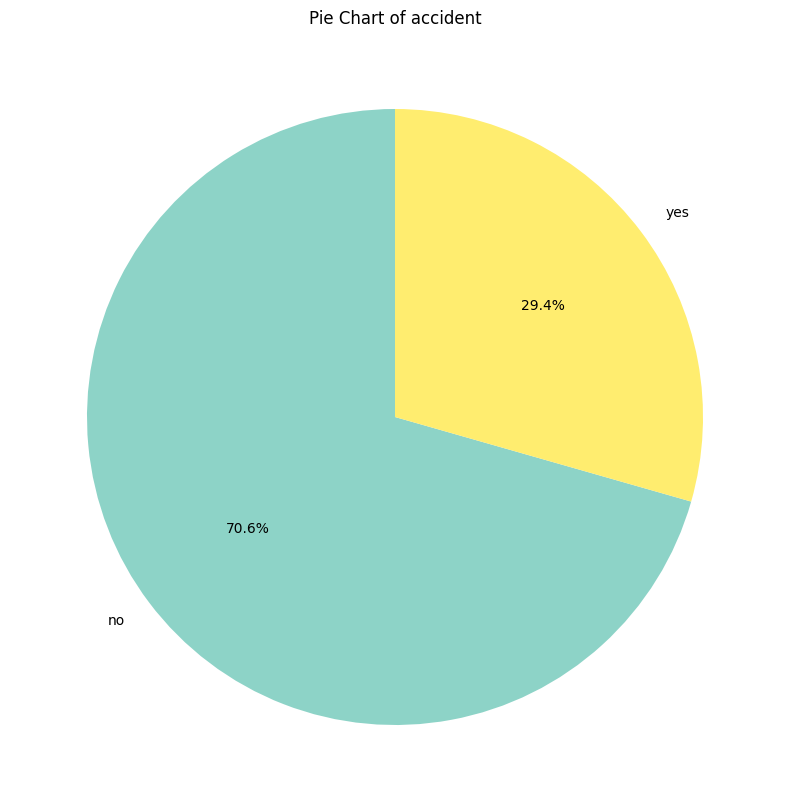

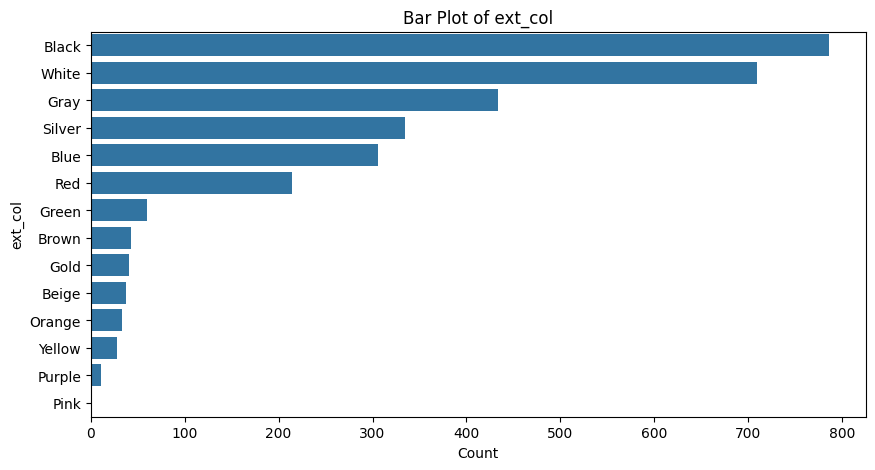

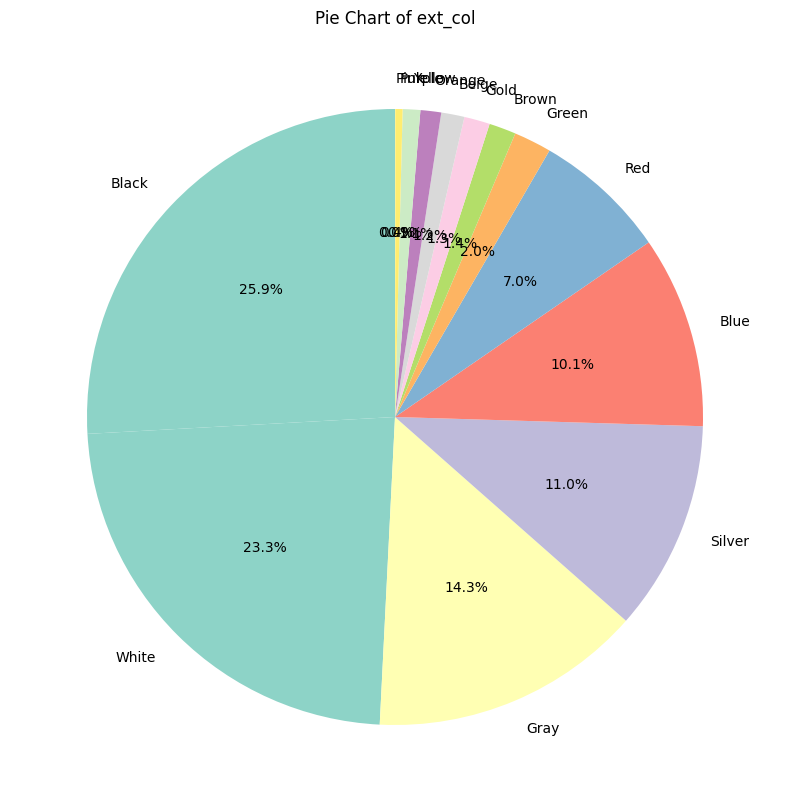

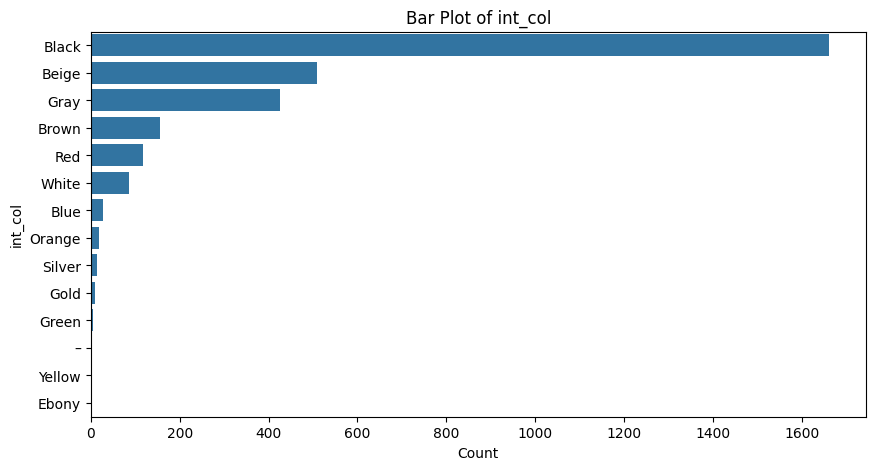

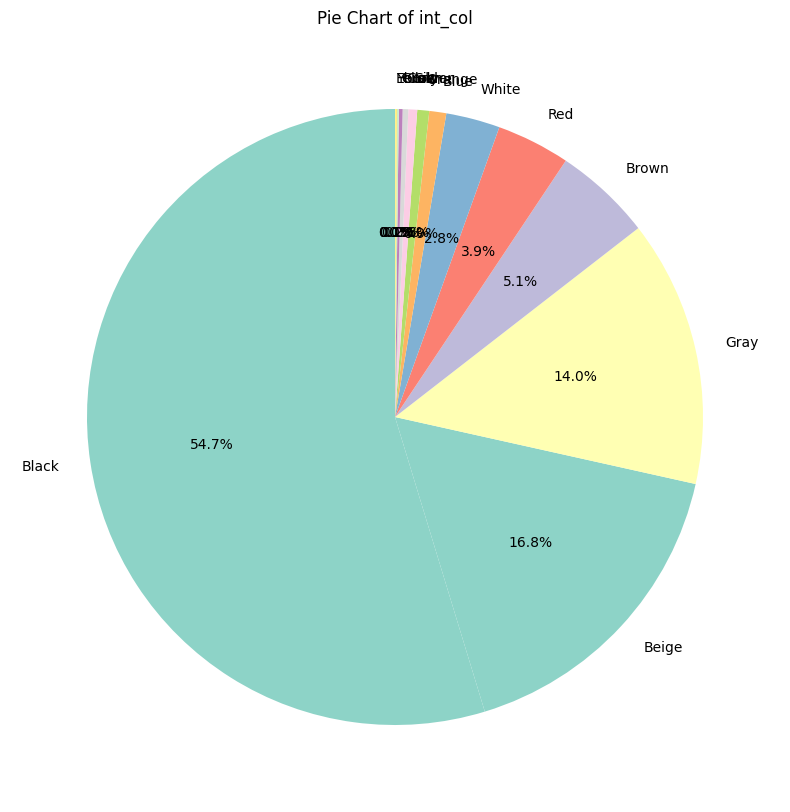

In [58]:
plot_data(old)

In [59]:
# for new cars
new.columns

Index(['CarName', 'fueltype', 'price', 'accident', 'milage', 'engine'], dtype='object')

In [60]:
# drop 'accident', 'milage'
new.drop(columns=['accident','milage'],inplace=True)

<ipython-input-60-b12c42c1bd67>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.drop(columns=['accident','milage'],inplace=True)


In [61]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CarName   205 non-null    object 
 1   fueltype  205 non-null    object 
 2   price     205 non-null    float64
 3   engine    205 non-null    object 
dtypes: float64(1), object(3)
memory usage: 8.0+ KB


In [62]:
new.engine = new.engine.astype('float')

<ipython-input-62-4d2699389e7e>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new.engine = new.engine.astype('float')


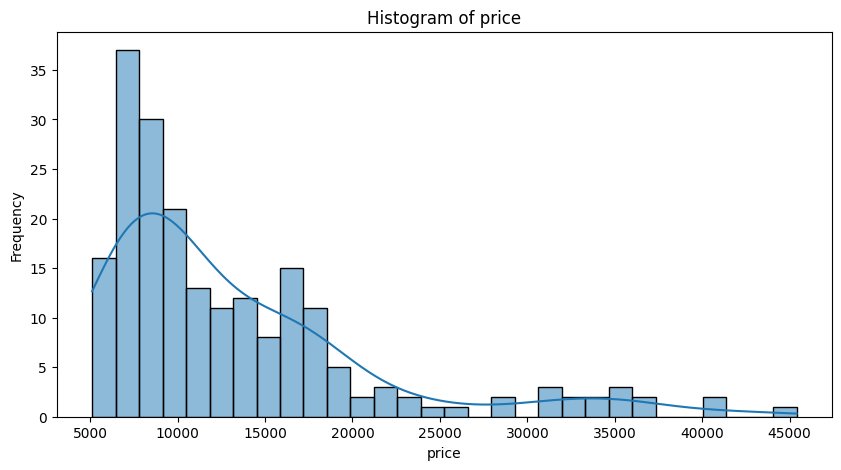

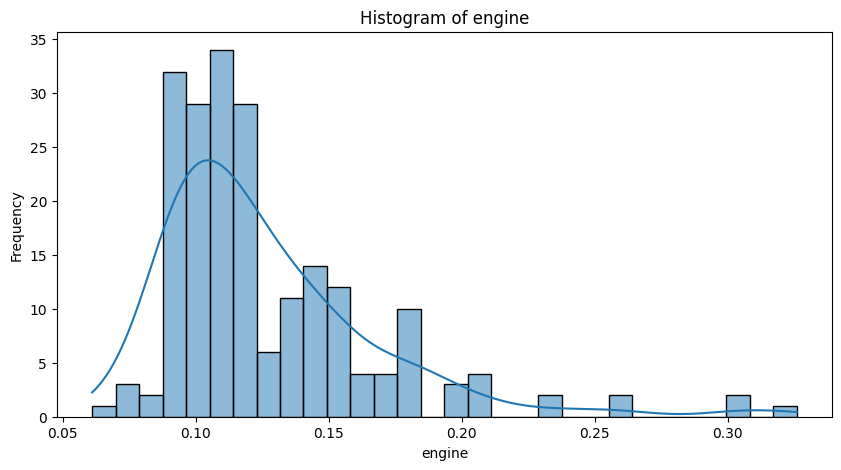

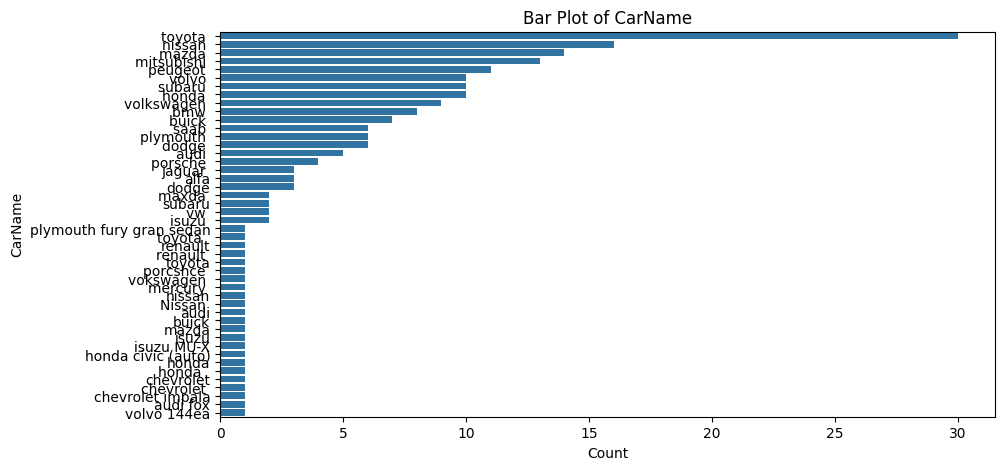

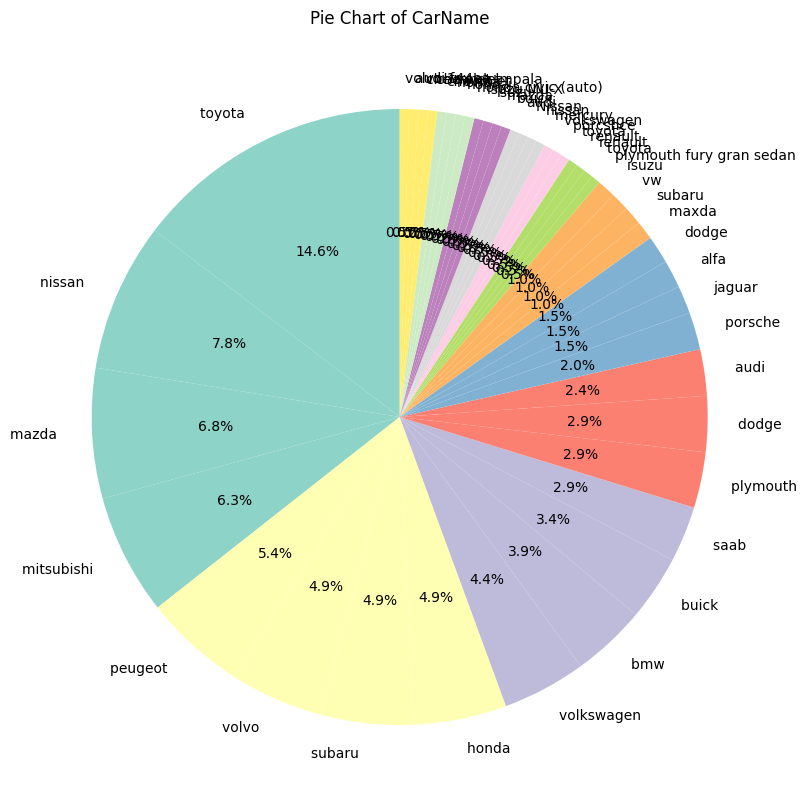

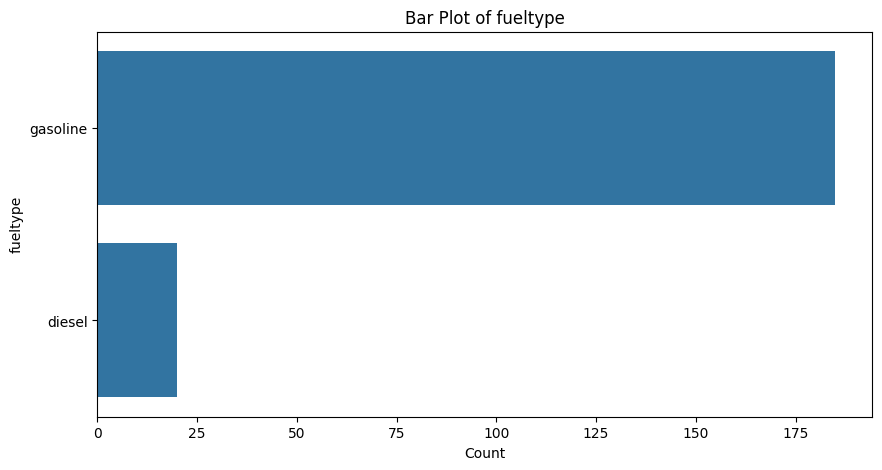

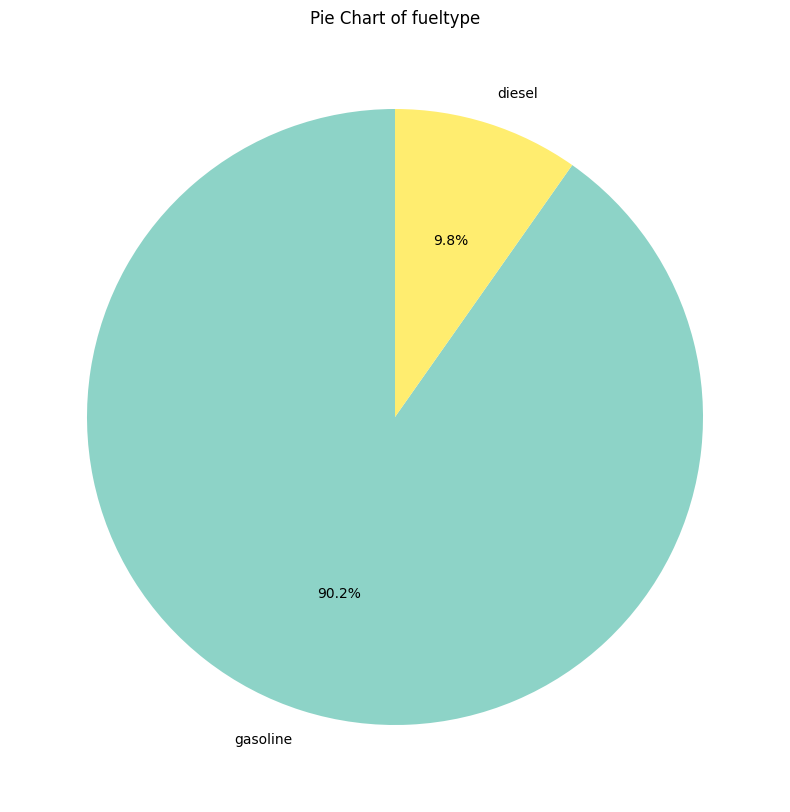

In [63]:
# for the new
plot_data(new)

In [66]:
new.columns

Index(['CarName', 'fueltype', 'price', 'engine'], dtype='object')

In [67]:
# Compute the correlation matrix
new[['price', 'engine']].corr()


,price,engine
price,1.000000,0.874145
engine,0.874145,1.000000


In [72]:
old[['price','milage','HP', 'motor_size', 'cylinders']].corr()

,price,milage,HP,motor_size,cylinders
price,1.000000,-0.502005,0.613239,0.226287,0.317639
milage,-0.502005,1.000000,-0.330257,0.060560,0.009575
HP,0.613239,-0.330257,1.000000,0.637217,0.723966
motor_size,0.226287,0.060560,0.637217,1.000000,0.883700
cylinders,0.317639,0.009575,0.723966,0.883700,1.000000


In [75]:
def plot_relations(df, target_column):
    numeric_columns = df.select_dtypes(include='number').columns.tolist()
    categorical_columns = df.select_dtypes(include='object').columns.tolist() + df.select_dtypes(include='category').columns.tolist()

    # Remove the target column from numeric columns
    if target_column in numeric_columns:
        numeric_columns.remove(target_column)

    # Plot scatter plots for numeric features
    for col in numeric_columns:
        plt.figure(figsize=(8, 6))
        sns.scatterplot(x=df[col], y=df[target_column])
        plt.title(f'Scatter plot between {col} and {target_column}')
        plt.xlabel(col)
        plt.ylabel(target_column)
        plt.show()

    # Plot histograms for categorical features
    for col in categorical_columns:
        plt.figure(figsize=(10, 6))
        mean_values = df.groupby(col)[target_column].mean()
        mean_values.plot(kind='hist', bins=10, edgecolor='black')
        plt.title(f'Histogram of mean {target_column} by {col}')
        plt.xlabel(f'Mean {target_column}')
        plt.ylabel('Frequency')
        plt.show()

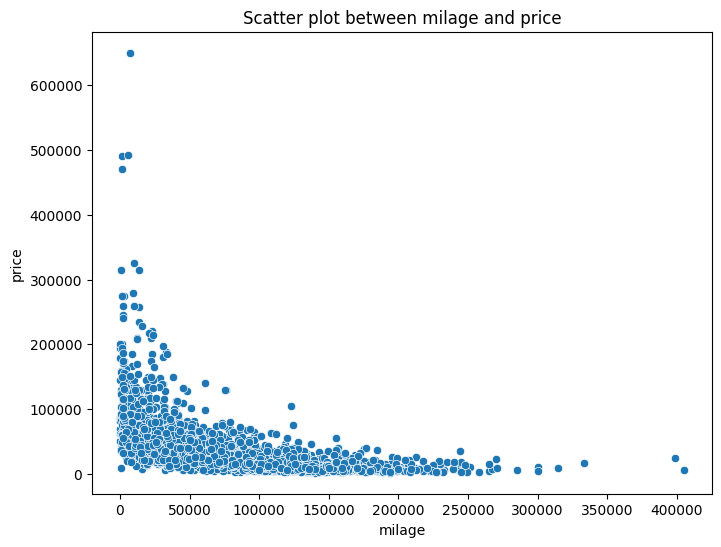

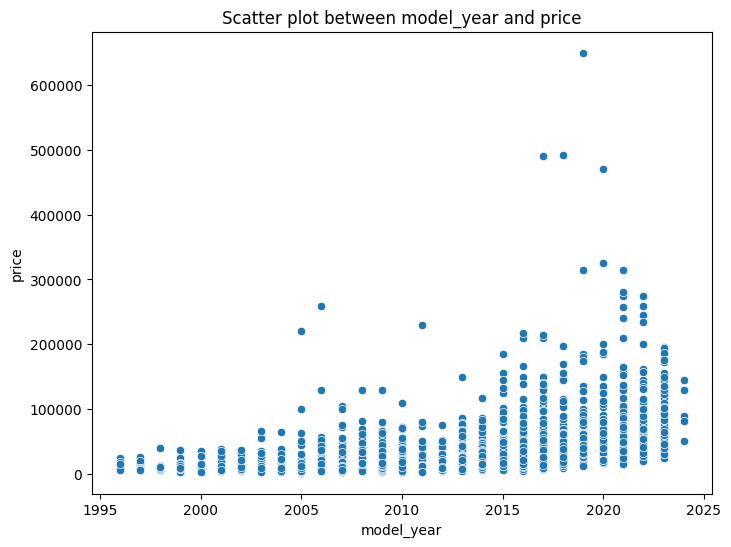

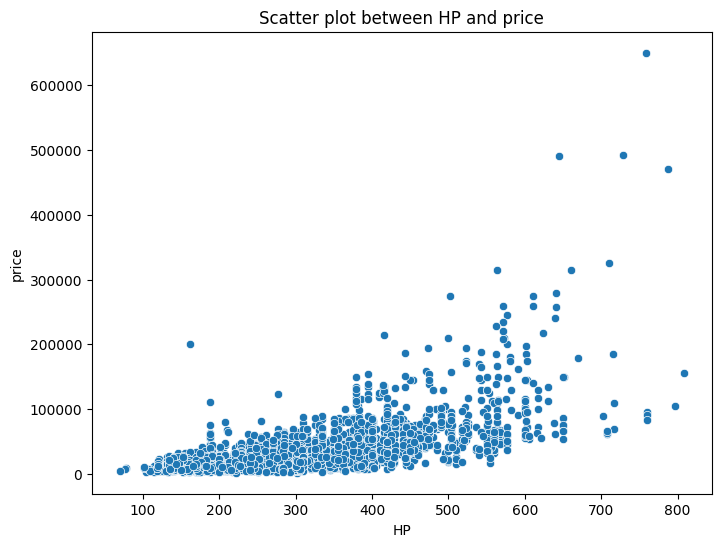

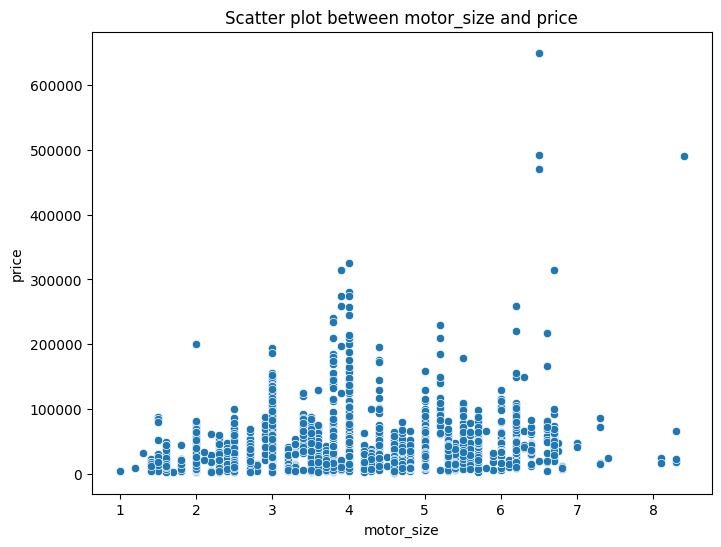

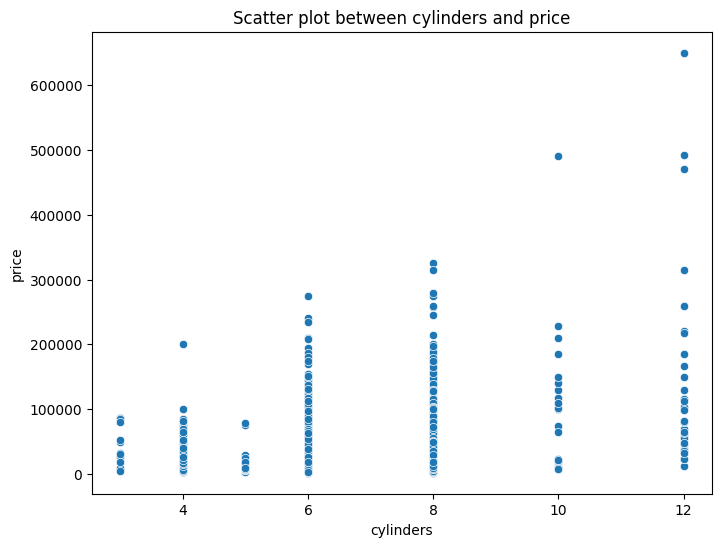

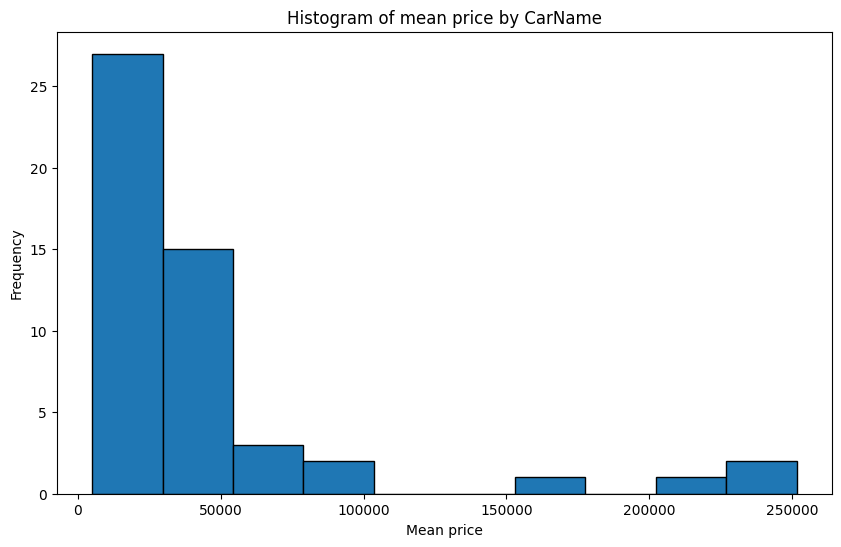

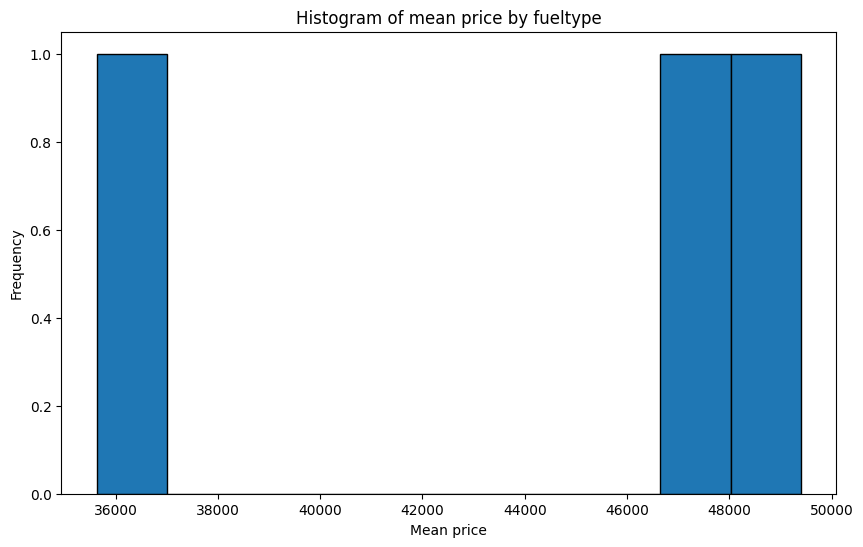

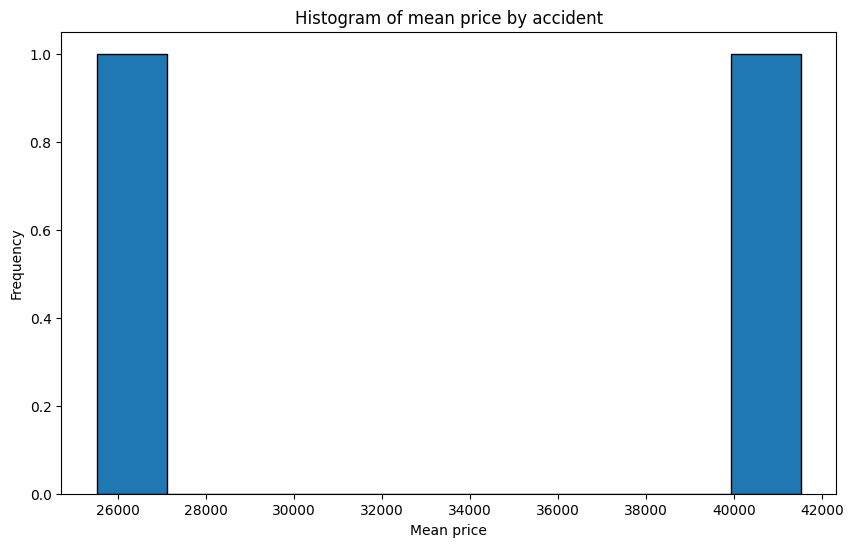

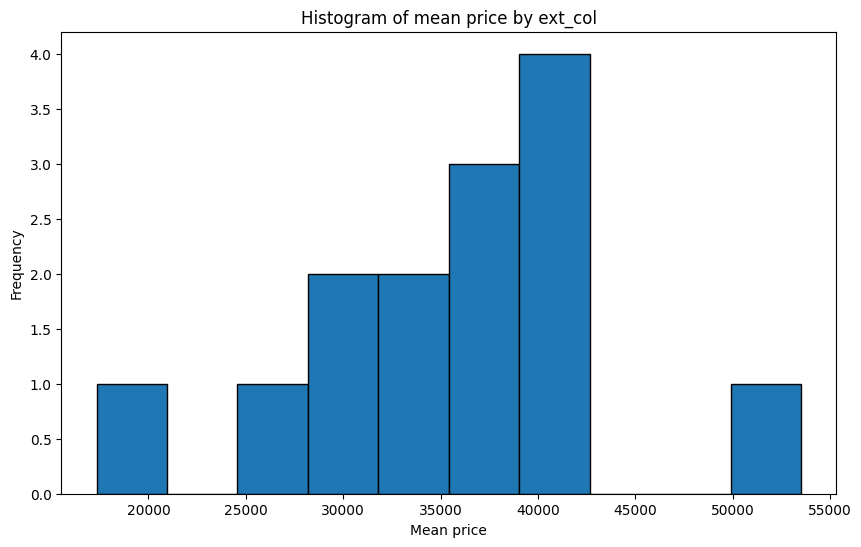

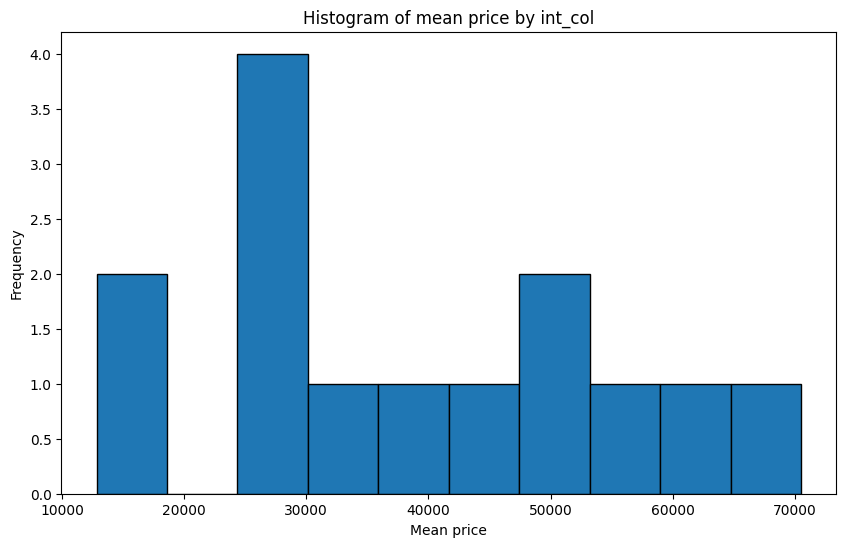

In [76]:
# Example usage
plot_relations(old, 'price')

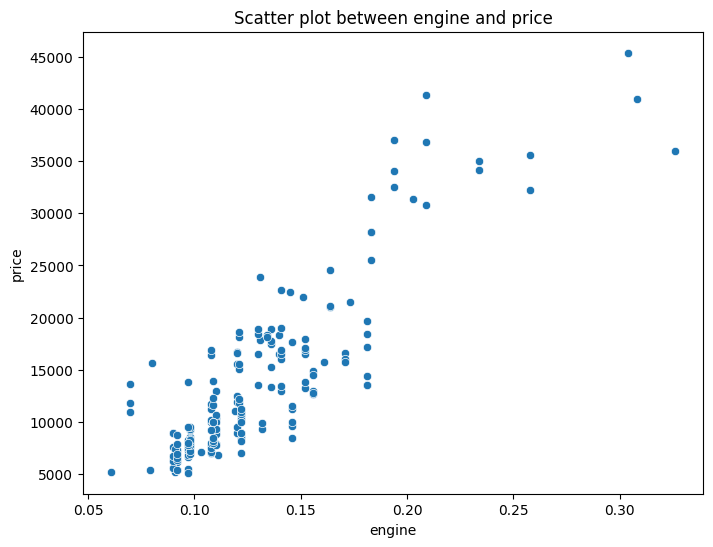

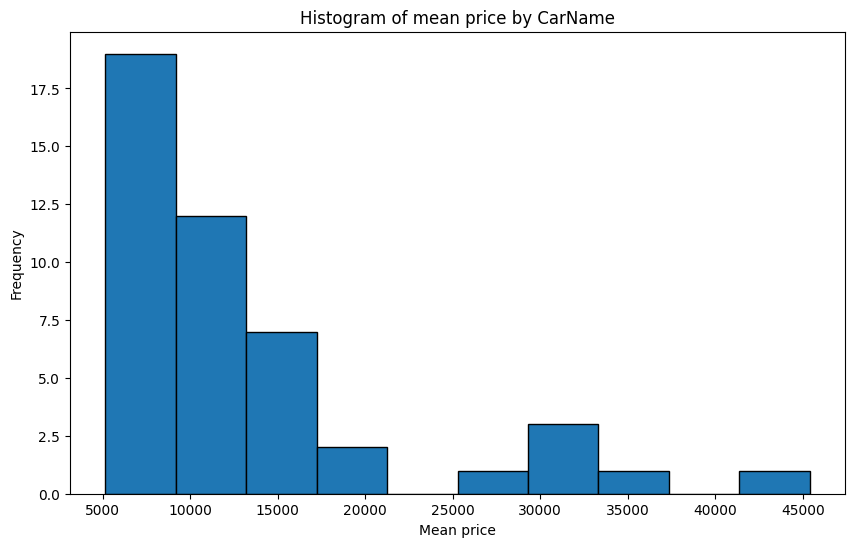

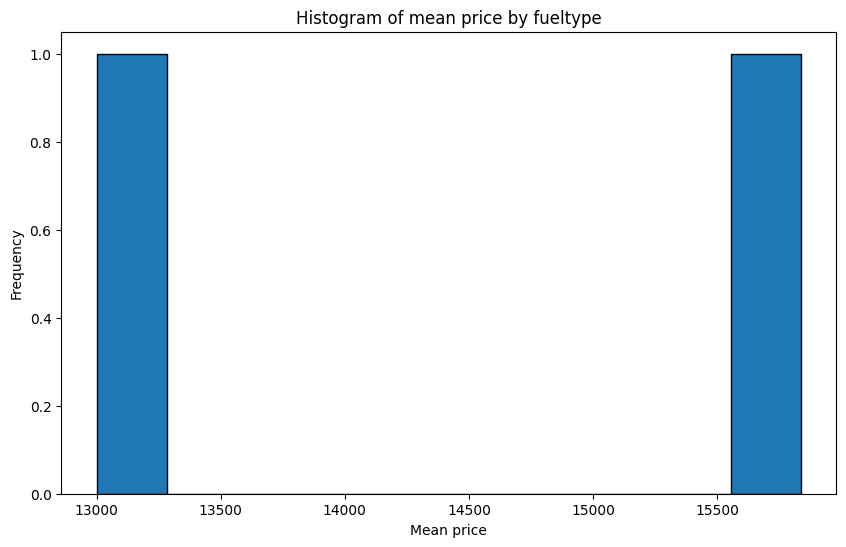

In [77]:
plot_relations(new, 'price')

In [78]:
old.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3038 entries, 206 to 4074
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarName     3038 non-null   object 
 1   fueltype    3038 non-null   object 
 2   price       3038 non-null   float64
 3   accident    3038 non-null   object 
 4   milage      3038 non-null   float64
 5   model_year  3038 non-null   float64
 6   ext_col     3038 non-null   object 
 7   int_col     3036 non-null   object 
 8   HP          3038 non-null   float64
 9   motor_size  3038 non-null   float64
 10  cylinders   3038 non-null   float64
dtypes: float64(6), object(5)
memory usage: 284.8+ KB


In [79]:
old.dropna(inplace=True)
print(old.isna().sum())

CarName       0
fueltype      0
price         0
accident      0
milage        0
model_year    0
ext_col       0
int_col       0
HP            0
motor_size    0
cylinders     0
dtype: int64


In [80]:
old.head()

,CarName,fueltype,price,accident,milage,model_year,ext_col,int_col,HP,motor_size,cylinders
206,Ford,gasoline,10300.0,yes,51000.0,2013.0,Black,Black,300.0,3.7,6.0
209,INFINITI,hybrid,15500.0,no,88900.0,2015.0,Black,Black,354.0,3.5,6.0
212,Audi,gasoline,31000.0,no,84000.0,2017.0,Blue,Black,292.0,2.0,4.0
213,BMW,gasoline,7300.0,no,242000.0,2001.0,Green,Green,282.0,4.4,8.0
214,Lexus,gasoline,41927.0,no,23436.0,2021.0,Black,Black,311.0,3.5,6.0


In [81]:
new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 0 to 204
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   CarName   205 non-null    object 
 1   fueltype  205 non-null    object 
 2   price     205 non-null    float64
 3   engine    205 non-null    float64
dtypes: float64(2), object(2)
memory usage: 8.0+ KB


In [82]:
new.head()

,CarName,fueltype,price,engine
0,alfa,gasoline,13495.0,0.130
1,alfa,gasoline,16500.0,0.130
2,alfa,gasoline,16500.0,0.152
3,audi,gasoline,13950.0,0.109
4,audi,gasoline,17450.0,0.136


In [83]:
# save cleaned data

old.to_csv('old_cleaned.csv',index=False)
new.to_csv('new_cleaned.csv',index=False)